In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))


# Background

In this dataset, we are given the information of customers from a mall. We would like to maximize our profit and to do so, we want to target customers who spend the most. This can be achieved through market segementation and the algorithim we will use to achive this is a basic clustering model known as K-Means. This is a form of unsupervised learning. 

# Exploring the Data

In [112]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [113]:
df.shape

(200, 5)

m = 200
n = 5

In [114]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Find out how many null vals exist in data set

In [115]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values, nice. Time to proceed.

# Data Visualization

In [116]:
plt.style.use('seaborn')

Histograms

<function matplotlib.pyplot.show(*args, **kw)>

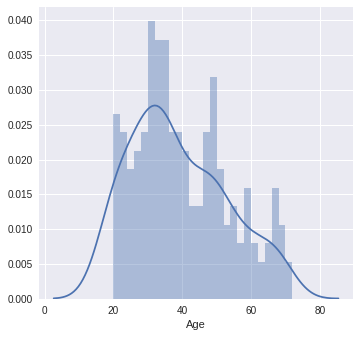

In [117]:
plt.figure(figsize=(5,5))
bins = np.arange(20,80,2)
# plt.hist(df.Age, bins=bins)
# plt.xticks(bins)
sns.distplot(df['Age'], bins=bins)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

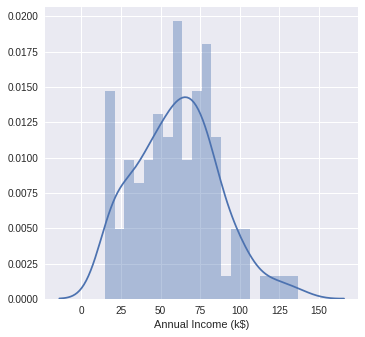

In [118]:
plt.figure(figsize=(5,5))
sns.distplot(df['Annual Income (k$)'], bins=20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

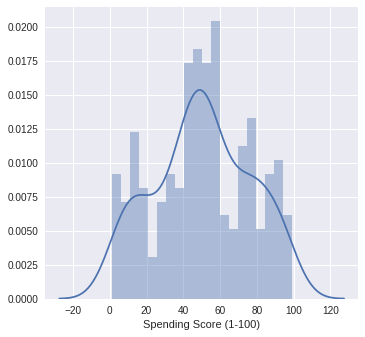

In [119]:
plt.figure(figsize=(5,5))
sns.distplot(df['Spending Score (1-100)'], bins=20)
plt.show

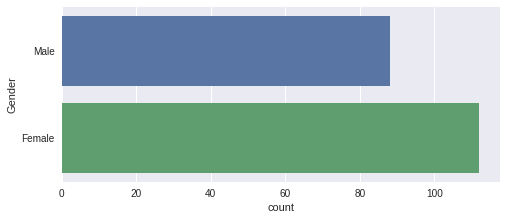

In [120]:
plt.figure(1 , figsize = (7 , 3))
sns.countplot(y = 'Gender' , data = df)
plt.show()

# Model plus visualization

When we want to vizualize models, it is beneficial to stick to 2 dimensions as higher dimension are much harder to interpret. For that reason, we only use kmeans for 2 features at a time. 

We can use PCA to reduce dimensionality of our data to help visualize it, but for this data set, it seems that we do not need to use it since we are dealing with a relatively small number of features. 

In [121]:
X_full = pd.get_dummies(df)
#We to target annual income and spending score

X = X_full.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

Determine number of clusters using elbow method

In [122]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init=20)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)





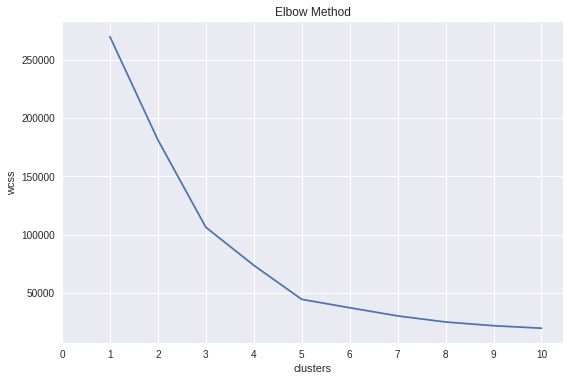

In [123]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
x_ticks = np.arange(0, 11, 1)
plt.xticks(x_ticks)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

Last elbow appears at 5, there for 5 is the right number of clusters

In [124]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)




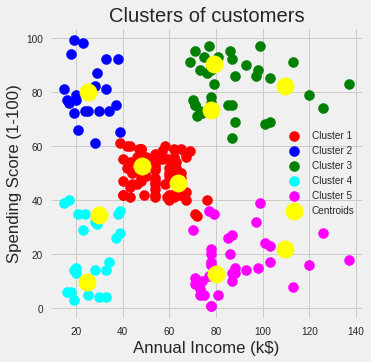

In [125]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(5, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [126]:
X2 = X_full.loc[:,['Age','Spending Score (1-100)']].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init=20)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)


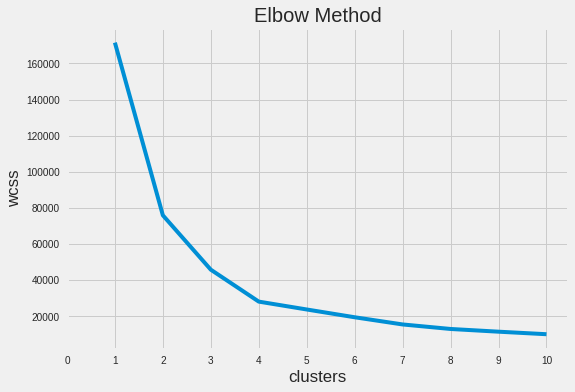

In [127]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
x_ticks = np.arange(0, 11, 1)
plt.xticks(x_ticks)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

It seems 4 is the optimal amount of clusters

In [128]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X2)


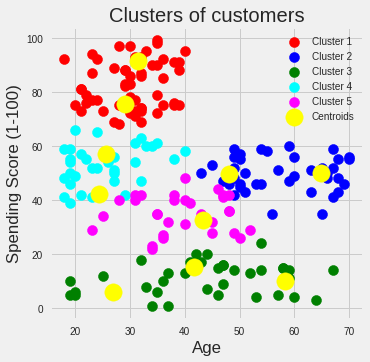

In [129]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(5, 5))
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Conclusion

 The first plot is clustering Annual Income and Spending score. If we were running a mall, customers that fall  in clusters 2 and 3 would be the ideal customers to target.
 
The second plot is perhaps contains more realistic data. Most customers would not be comfortable disclosing their income but age is data that is more easier to collect. We can see customers in cluster 1 are the most profitable. They fall between ages 20 - 40, older customers tend to spend less, 



 

